In [24]:
from skimage import data
from skimage.viewer import ImageViewer
from skimage.viewer.canvastools import RectangleTool
from skimage.draw import line
from skimage.draw import set_color
import numpy as np

image = data.camera()
viewer = ImageViewer(image)
# doing this for top-bar compatability : )
def replace_show(self=viewer,x=50,y=50):
    self.move(x, y)
    for p in self.plugins:
        p.show()
    super(ImageViewer, self).show()
    self.activateWindow()
    self.raise_()
viewer._show = replace_show
def print_the_rect(extents):
    # x0, x1, y0, y1 = extents
    print(extents)

rect_tool = RectangleTool(viewer, on_enter=print_the_rect,on_release=) 
viewer.show()



(192.53781512605045, 409.81512605042019, 96.806722689075627, 265.68067226890759)
(36.571428571428598, 489.41176470588238, 48.403361344537814, 319.46218487394958)
(151.66386554621852, 256.0, 67.764705882352985, 190.38655462184875)
(244.16806722689077, 366.78991596638656, 107.56302521008405, 198.99159663865549)
(72.067226890756331, 394.75630252100842, 47.327731092436977, 378.62184873949582)


[]

In [35]:
from skimage.viewer.widgets import Slider
from skimage.viewer.plugins import PlotPlugin
plugin = PlotPlugin() 
def _on_new_image(self=plugin, image=None):
    

    self.ax.set_title('Color Histogram')
    self.ax.set_xlabel('b')
    self.ax.set_ylabel('a')
image = data.coins()
viewer = ImageViewer(image) 
viewer += plugin                  
thresholded = viewer.show()

In [37]:
from tile_select import TileViewer, TilePreview

In [50]:
image = data.camera()
image.shape
test_copy = np.zeros(image.shape)

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt


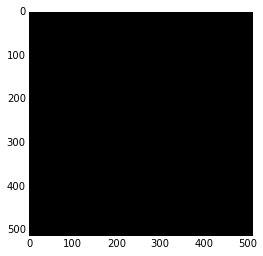

In [45]:
plt.imshow(test_copy,cmap='gray')

In [46]:
def blit(dest, src, loc):
    pos = [i if i >= 0 else None for i in loc]
    neg = [-i if i < 0 else None for i in loc]
    target = dest[[slice(i,None) for i in pos]]
    src = src[[slice(i, j) for i,j in zip(neg, target.shape)]]
    target[[slice(None, i) for i in src.shape]] = src
    return dest

In [57]:
def copy_tile(source_img,extents):
    x0, x1, y0, y1 = np.int64(extents)
    dest = np.zeros(image.shape)
    src_w, src_h = source_img.shape[:2]
    tile_w, tile_h = x1 - x0, y1 - y0
    w_offset = src_w % tile_w
    h_offset = src_h % tile_h
    for w in range(0,src_w // tile_w + 2):
        for h in range(0,src_h // tile_h + 2):
            blit(dest,source_img[y0:y1,x0:x1],(h*tile_h-h_offset,w*tile_w-w_offset))
    return dest
        
    

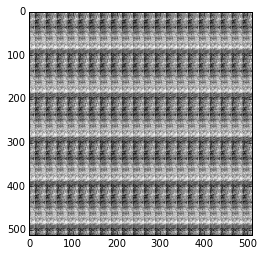

In [58]:
test_tile = copy_tile(image,(50,75,0,100))
plt.imshow(test_tile,cmap='gray')

In [ ]:
# file prep
#!ffmpeg -i ./cr.mkv_excerpt_000.mkv
#     Stream #0:0: Video: h264 (High), yuvj420p, 1920x1080 [SAR 1:1 DAR 16:9], 23.98 fps, 23.98 tbr, 1k tbn, 47.95 tbc (default)
!ffmpeg -i ./cr.mkv_excerpt_000.mkv -r 23.98 -q:v 2 ./frames/img-%d.jpeg